<a href="https://colab.research.google.com/github/rosebaekfany/linear-algebra_HW3/blob/main/CHW3_400110009.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h4 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>
<h4 align="center">Python Assignment 3</h4>


________________________________________________________________________________________________________________________________

**Feel free to contact us via telegram if you have any question: @SAHABE200 (Q2) ,@amirsoleix (Q1 and Q3)**

# Q1: SVD for Compression (35 points)

One application of Singular Value Decomposition is lossy image compression. In this question, we want to compress BMP images using SVD. BMP images are not compressed by default and the pixel information is stored in rather a simple format. Colored BMP files are composed of three matrices of size $n × m$ where $n$ and $m$ are the height and width of the image, respectively. Each matrix corresponds to one of the three colors Red, Green, and Blue. Each entry of these matrices is a number between 0 and 255 that specifies the intensity of the corresponding color. The final array is hence a 3D array of size $n × m × 3$.
To open BMP files in Python, you can use the `imread` function from `matplotlib.image` library and to show the image, you can use the `imshow` function from `matplotlib.pyplot` library.

### 1.1 Image display  (2.5 points)
Choose two arbitrary BMP files (it is recommended to use different subjects and sizes) and load it into a `numpy` array using the `imread` function. Then, show each image.
Apply the following steps to each of the two images and display the results.

In [32]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import pandas as pd
import random
from tabulate import tabulate
from sklearn.metrics import mean_squared_error

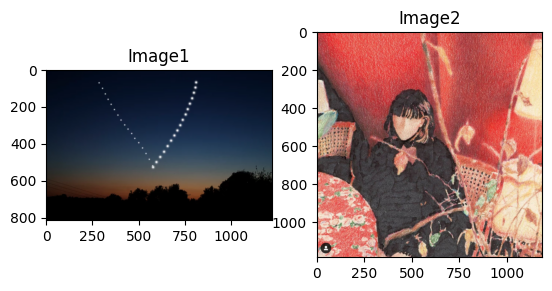

In [4]:
# Load the BMP image into a numpy array
img1 = mpimg.imread('img1.bmp')
img2 = mpimg.imread('img2.bmp')

fig, axs = plt.subplots(1, 2)
axs[0].imshow(img1)
axs[0].set_title('Image1')
axs[1].imshow(img2)
axs[1].set_title('Image2')
plt.show()


### 1.2 Channel Separation (2.5 points)
Separate three channels corresponding to red, green, and blue colors.
``` Python
r = img[:, :, 0]
g = img[:, :, 1]
b = img[:, :, 2]
```

In [5]:
R1 = img1[:,:,0]
G1 = img1[:,:,1]
B1 = img1[:,:,2]

R2 = img2[:,:,0]
G2 = img2[:,:,1]
B2 = img2[:,:,2]

### 1.3 Singular Value Decomposition (10 points)
Using appropriate libraries, calculate the SVD decomposition of each of the arrays.
$$
A = U \Sigma V^T
$$
where $A$ is the original array, $U$ is an $n × n$ unitary matrix, $\Sigma$ is an $n × m$ rectangular diagonal matrix with non-negative real numbers on the diagonal, and $V$ is an $m × m$ unitary matrix.

In [6]:
# Apply SVD to each of the three matrices separately
Ur1, Sr1, Vr1 = np.linalg.svd(R1)
Ug1, Sg1, Vg1= np.linalg.svd(G1)
Ub1, Sb1, Vb1 = np.linalg.svd(B1)

Ur2, Sr2, Vr2 = np.linalg.svd(R2)
Ug2, Sg2, Vg2 = np.linalg.svd(G2)
Ub2, Sb2, Vb2 = np.linalg.svd(B2)


### 1.4 Compression (10 points)
Since eigenvalues in the decomposition are sorted in descending order, we can approximate the original array by keeping only the first $k$ columns of $U$, first $k$ rows and columns of $\Sigma$, and first $k$ rows of $V^T$.
Select $k$ to be 5, 10, 50, 100 and 250 and approximate the original array using the truncated SVD. Show the approximated image titled with the value of $k$.

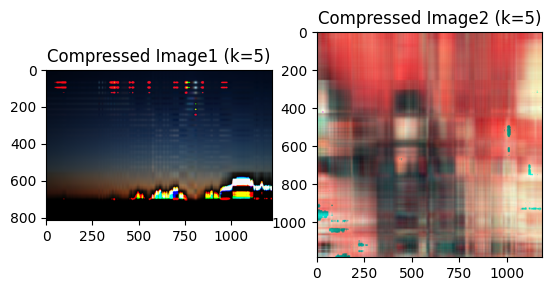

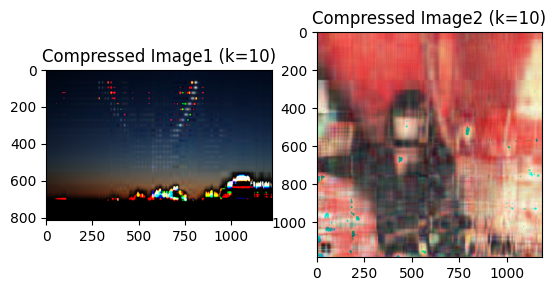

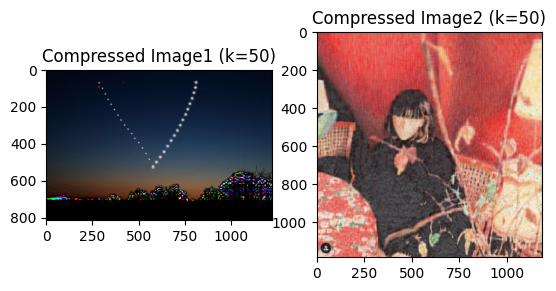

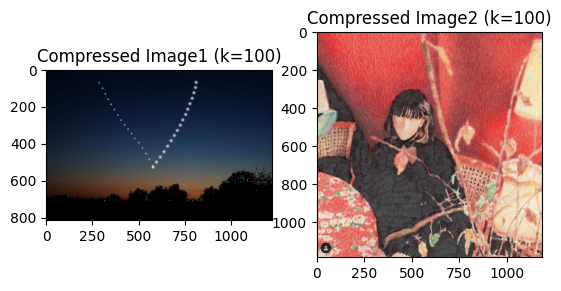

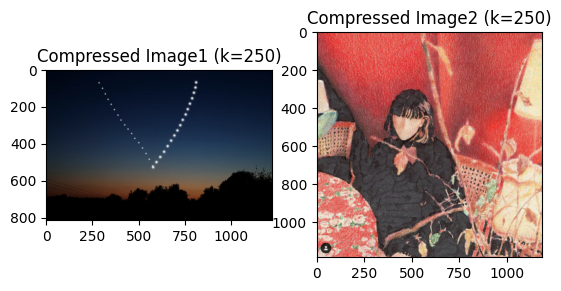

In [7]:
for k in [5,10,50,100,250]:

    Rk1 = Ur1[:,:k] @ np.diag(Sr1[:k]) @ Vr1[:k,:]
    Gk1 = Ug1[:,:k] @ np.diag(Sg1[:k]) @ Vg1[:k,:]
    Bk1 = Ub1[:,:k] @ np.diag(Sb1[:k]) @ Vb1[:k,:]

    Rk2 = Ur2[:,:k] @ np.diag(Sr2[:k]) @ Vr2[:k,:]
    Gk2 = Ug2[:,:k] @ np.diag(Sg2[:k]) @ Vg2[:k,:]
    Bk2 = Ub2[:,:k] @ np.diag(Sb2[:k]) @ Vb2[:k,:]

    height1, width1, channels1 = img1.shape
    img_compressed1 = np.full((3,height1, width1), [Rk1, Gk1, Bk1], dtype=('uint8'))

    height2, width2, channels2 = img2.shape
    img_compressed2 = np.full((3,height2, width2), [Rk2, Gk2, Bk2], dtype=('uint8'))


    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(img_compressed1[:,:,:].transpose(1, 2, 0))
    axs[0].set_title('Compressed Image1 (k=%d)' %k)
    axs[1].imshow(img_compressed2[:,:,:].transpose(1, 2, 0))
    axs[1].set_title('Compressed Image2 (k=%d)'%k)
    plt.show()


### 1.5 Compression Factor (10 points)
It seems that no compression is done since the size of the approximated array is the same as the original array. However, there is no need to store $U$ and $V$ matrices. Instead, we can store $\Sigma$ and two other matrices of size $n × k$ and $m × k$. Hence, we can compress the image by a factor of $\frac{nm}{k(n+m+1)}$. Calculate the compression factor for each value of $k$ and display the results in a table.

In [11]:
n1, m1 = R1.shape
original_size1 = n1 * m1 * 3

n2, m2 = R2.shape
original_size2 = n2 * m2 * 3

compression_factors1 = []
compression_factors2 = []

for k in [5,10,50,100,250]:

    Rk1 = Ur1[:,:k] @ np.diag(Sr1[:k]) @ Vr1[:k,:]
    Gk1 = Ug1[:,:k] @ np.diag(Sg1[:k]) @ Vg1[:k,:]
    Bk1 = Ub1[:,:k] @ np.diag(Sb1[:k]) @ Vb1[:k,:]

    Rk2 = Ur2[:,:k] @ np.diag(Sr2[:k]) @ Vr2[:k,:]
    Gk2 = Ug2[:,:k] @ np.diag(Sg2[:k]) @ Vg2[:k,:]
    Bk2 = Ub2[:,:k] @ np.diag(Sb2[:k]) @ Vb2[:k,:]

    # Calculate the size of the compressed array
    compressed_size1 = n1 * k + m1 * k + k
    compressed_size2 = n2 * k + m2 * k + k

    # Calculate the compression factor
    compression_factor1 = original_size1 / compressed_size1
    compression_factors1.append(compression_factor1)

    compression_factor2 = original_size2 / compressed_size2
    compression_factors2.append(compression_factor2)

# Display the compression factors in a table
print('ktCompression Factor1')
for k, cf in enumerate(compression_factors1, start=1):
    print(f'{k}t{cf:.2f}')
print('ktCompression Factor2')
for k, cf in enumerate(compression_factors2, start=1):
    print(f'{k}t{cf:.2f}')

kp = [5,10,50,100,250]

Kp =  np.zeros(4)
C1 = np.zeros(4)
C2 = np.zeros(4)
for i in range(4):
    Kp[i] = kp[i]
    k = Kp[i]
    C1[i] = n1*m1/(k*(n1+m1+1))
    C2[i] = n2*m2/(k*(n2+m2+1))

data = np.concatenate((Kp.reshape(4,1), C1.reshape(4,1), C2.reshape(4,1)), axis=1)
col_names = ["k", "compression factor1", "compression factor2"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))




ktCompression Factor1
1t292.37
2t146.18
3t29.24
4t14.62
5t5.85
ktCompression Factor2
1t356.10
2t178.05
3t35.61
4t17.80
5t7.12
╒═════╤═══════════════════════╤═══════════════════════╕
│   k │   compression factor1 │   compression factor2 │
╞═════╪═══════════════════════╪═══════════════════════╡
│   5 │               97.456  │               118.7   │
├─────┼───────────────────────┼───────────────────────┤
│  10 │               48.728  │                59.35  │
├─────┼───────────────────────┼───────────────────────┤
│  50 │                9.7456 │                11.87  │
├─────┼───────────────────────┼───────────────────────┤
│ 100 │                4.8728 │                 5.935 │
╘═════╧═══════════════════════╧═══════════════════════╛


# Q2: PCA in Image Processing (40 points)

In this question you will implement the PCA from scratch and apply it for dimensionality
reduction and image denoising. you will use the well-known MNIST data set that is commonly used for training various image processing systems.


#### 1. Data Preparation (5 points)
The MNIST data set is a large data set of handwritten digits (from
0 to 9), containing 60000 gray-scale images for training and 10000 for testing, each image has 28x28 pixels with range of possible values from 0 to 255.

we will consider a small sample of MNIST data set with size of 2000.

Re-scale the images to [0, 1] dividing them by 255. Vectorize each image xi ∈ $R^d$ and form a matrix X=$[x1, . . . , xn]^T$ ∈ $R_{n×d}$.
Remark that we will have d=784 and n=2000.

In [ ]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from keras.datasets import mnist
from numpy.linalg import eigh
from sklearn.decomposition import PCA

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# selecting 2000 images and dividing them by 255
x_train = x_train[:2000] / 255.0
y_train = y_train[:2000]

# vectorize each image and forming matrix X
x_train = x_train.reshape(x_train.shape[0], -1)

# normalizing the data mean=0 std=1
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

#### 2. Compute the Eigendecomposition (10 points)
Compute the eigendecomposition of the sample covariance matrix and use the eigenvalues to calculate the percentage of variance explained (given by the eigenvalues).
Plot the cumulative sum of these percentages (also known as cumulative explained variance. you can read about it in [cumulative explained variance](https://vitalflux.com/pca-explained-variance-concept-python-example/)) versus the number of components.

*Hint: you can use cumsum from Numpy to calculate the cumulative sum.*


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


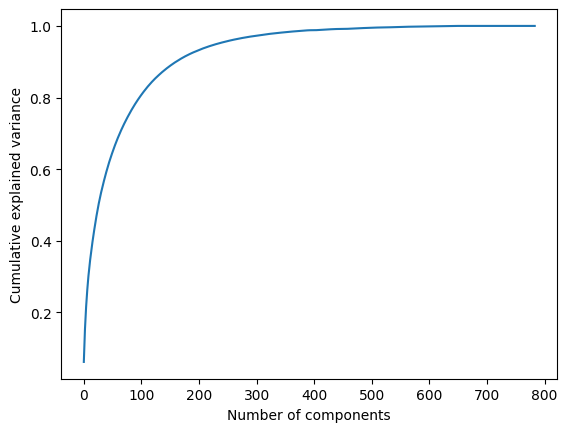

In [ ]:
# Compute the covariance matrix
cov_mat = np.cov(x_train.T)

# Eigendecomposition of covariance matrix
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# Compute explained variance
explained_var = eig_vals / np.sum(eig_vals)

# Plot the cumulative explained variance
cumulative_var = np.cumsum(explained_var)
plt.plot(cumulative_var)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

#### 3. Reduce the Dimensionality (10 points)
Apply the PCA via Eigendecomposition to reduce the dimensionality of the images for each p ∈ {50, 250, 500}.

Compute the normalized reconstruction error in terms of the Frobenius norm, i.e. $e_p = \frac{||X - {X_p}||_F}{||X||_F}$ , where $X$ denotes the input matrix, and ${X_p}$ denotes the recovered matrix associated to each p.

Visualize some recovered images and compare them with their corresponding original images.

what happens when we reduce the number of components p?

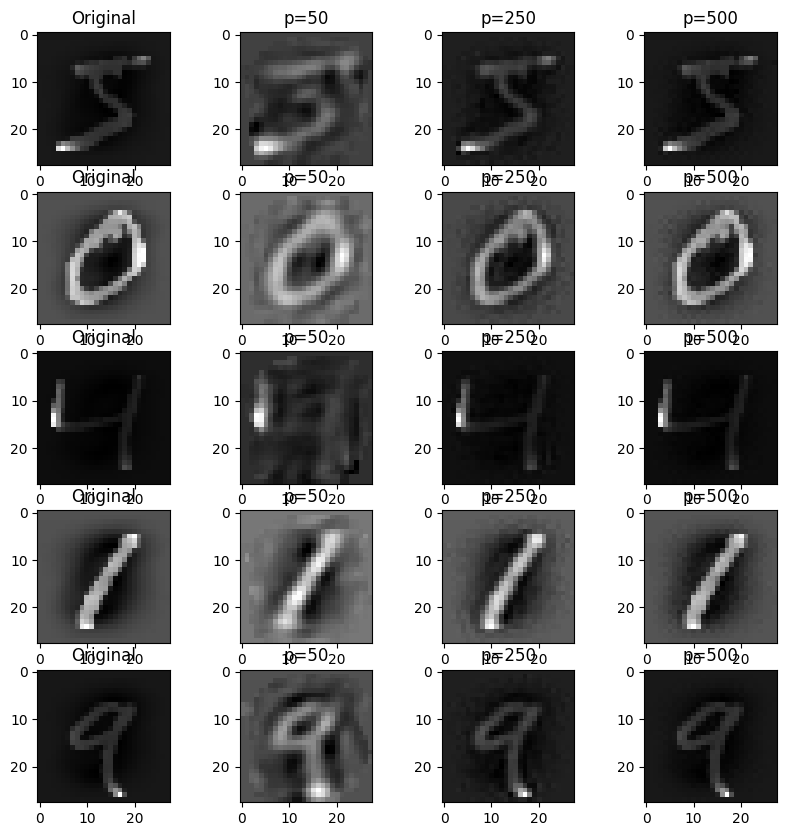

In [ ]:
# Apply the PCA
p_values = [50, 250, 500]
X_reduced = {}
for p in p_values:
    eig_vecs_p = eig_vecs[:, :p].real
    X_reduced[p] = x_train.dot(eig_vecs_p)

# reconstruct the orginal matrix X
X_reconstructed = {}
for p in p_values:
    eig_vecs_p = eig_vecs[:, :p].real
    X_reconstructed[p] = X_reduced[p].dot(eig_vecs_p.T)

# Visualize recovered images
n_images = 5
fig, axes = plt.subplots(nrows=n_images, ncols=len(p_values)+1, figsize=(10, 10))
for i in range(n_images):
    axes[i, 0].imshow(x_train[i].reshape(28, 28), cmap='gray')
    axes[i, 0].set_title('Original')
    for j, p in enumerate(p_values):
        axes[i, j+1].imshow(X_reconstructed[p][i].reshape(28, 28), cmap='gray')
        axes[i, j+1].set_title(f'p={p}')

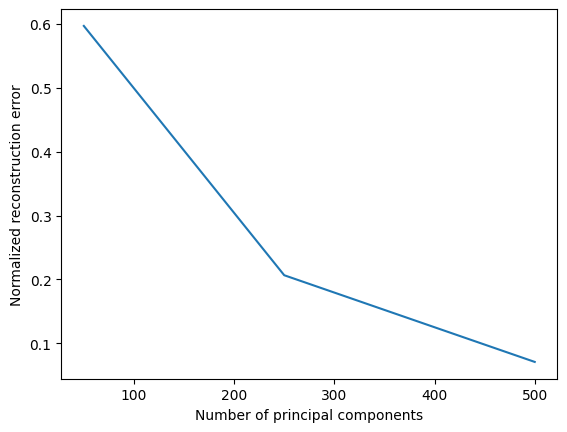

In [ ]:
# Compute the normalized reconstruction error
error = {}
for p in p_values:
    error[p] = np.linalg.norm(x_train - X_reconstructed[p], 'fro') / np.linalg.norm(x_train, 'fro')

# Plot the normalized reconstruction error vs number of principal components
plt.plot(p_values, [error[p] for p in p_values])
plt.xlabel('Number of principal components')
plt.ylabel('Normalized reconstruction error')
plt.show()

#### 4. Image noising (5 points)
Considering the same input matrix, let’s add some Gaussian noise (make sure that the range of possible values of the generated noisy data will remain between 0 and1, as well as the input data) with zero mean and variance $σ^2$ = 0.25.

Visualize the corrupted images and compare them with their corresponding original images versus the number of components, as in the first item.

Compare it with the one obtained in the noiseless case.

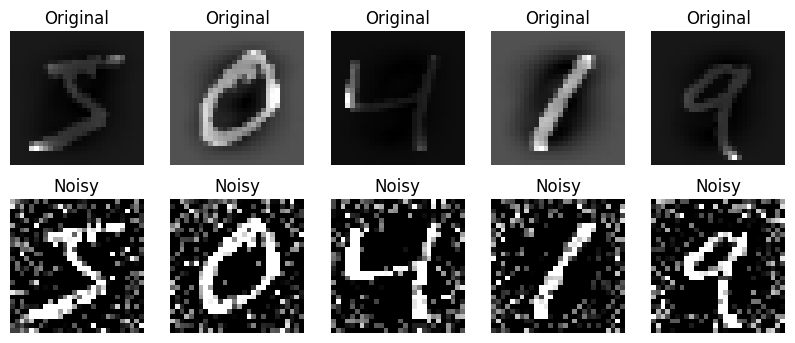

In [ ]:
# Add Gaussian noise with zero mean and variance 0.25
noise = np.random.normal(loc=0, scale=0.5, size=x_train.shape)
X_noisy = np.clip(x_train + noise, 0, 1)

# Plot the first 5 original and noisy images
fig, axs = plt.subplots(2, 5, figsize=(10, 4))
for i in range(5):
    axs[0, i].imshow(x_train[i].reshape(28, 28), cmap='gray')
    axs[0, i].axis('off')
    axs[1, i].imshow(X_noisy[i].reshape(28, 28), cmap='gray')
    axs[1, i].axis('off')
    axs[0, i].set_title('Original')
    axs[1, i].set_title('Noisy')
plt.show()

#### 5. Recovering Images (10 points)
Now we will apply the PCA for image denoising. Generate the noisy data, for each $σ^2$ ∈ {0.15, 0.25, 0.50}.
Apply the PCA via Eigendecomposition for each $σ^2$ and fixing p = 250.

Visualize some recovered images and compare them with their corresponding noisy images.

Compute the normalized reconstruction error in terms of the Frobenius norm, obtained for all values of $σ^2$, with respect to the original images.


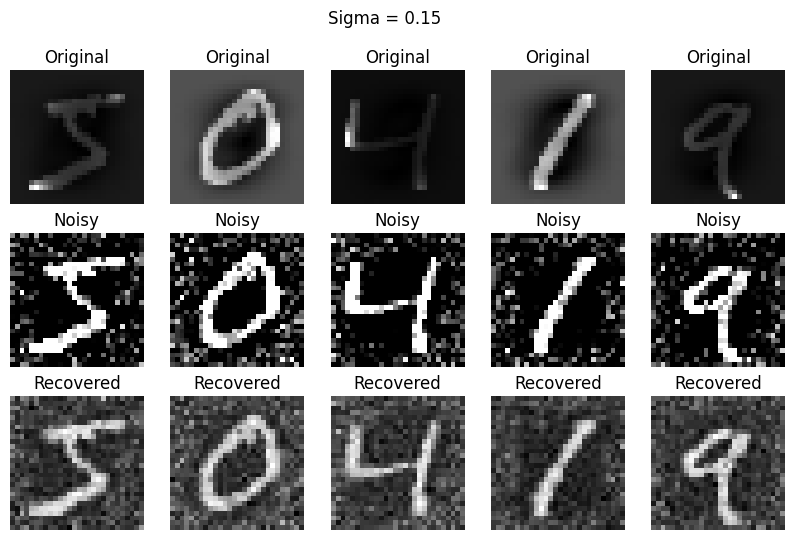

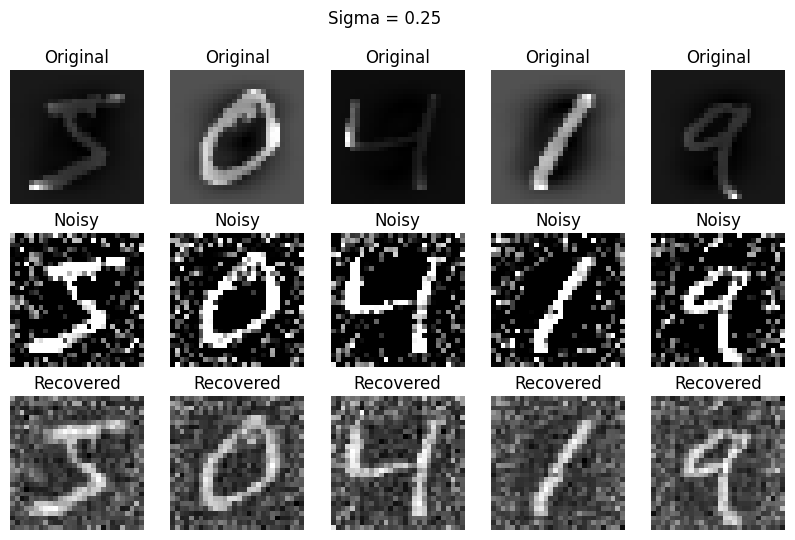

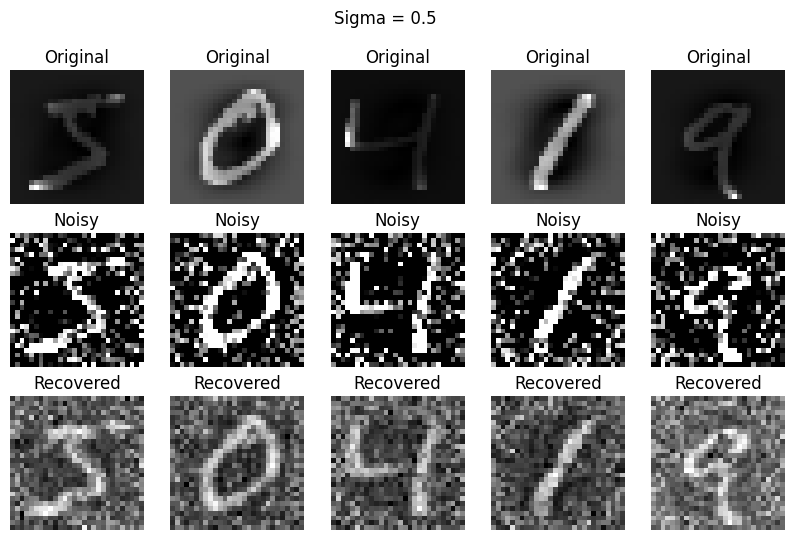

In [ ]:
# Generate noisy data for each sigma
sigmas = [0.15, 0.25, 0.5]
X_noisy_list = []
for sigma in sigmas:
    noise = np.random.normal(loc=0, scale=np.sqrt(sigma), size=x_train.shape)
    X_noisy = np.clip(x_train + noise, 0, 1)
    X_noisy_list.append(X_noisy)

# Apply PCA via eigendecomposition for each sigma and p=250
p = 250
X_reconstructed_list = []
error_list = []
for X_noisy in X_noisy_list:
    pca = PCA(n_components=p)
    pca.fit(X_noisy)
    X_pca = pca.transform(X_noisy)
    X_reconstructed = pca.inverse_transform(X_pca)
    X_reconstructed_list.append(X_reconstructed)
    error = np.linalg.norm(x_train - X_reconstructed) / np.linalg.norm(x_train)
    error_list.append(error)

# Plot the first 5 original, noisy, and recovered images for each sigma
for i, X_noisy in enumerate(X_noisy_list):
    fig, axs = plt.subplots(3, 5, figsize=(10, 6))
    for j in range(5):
        axs[0, j].imshow(x_train[j].reshape(28, 28), cmap='gray')
        axs[0, j].axis('off')
        axs[1, j].imshow(X_noisy[j].reshape(28, 28), cmap='gray')
        axs[1, j].axis('off')
        axs[2, j].imshow(X_reconstructed_list[i][j].reshape(28, 28), cmap='gray')
        axs[2, j].axis('off')
        axs[0, j].set_title('Original')
        axs[1, j].set_title('Noisy')
        axs[2, j].set_title('Recovered')
    fig.suptitle(f'Sigma = {sigmas[i]}')
    plt.show()

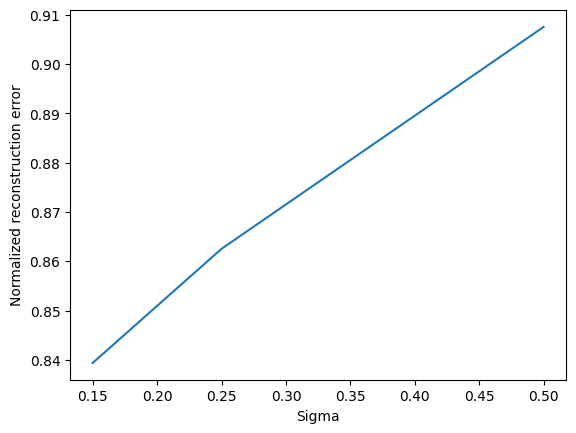

In [ ]:
# Compute the normalized reconstruction error for each sigma
error_list = []
for X_reconstructed in X_reconstructed_list:
    error = np.linalg.norm(x_train - X_reconstructed) / np.linalg.norm(x_train)
    error_list.append(error)

# Plot the normalized reconstruction error versus sigma
plt.plot(sigmas, error_list)
plt.xlabel('Sigma')
plt.ylabel('Normalized reconstruction error')
plt.show()

# Q3: PCA in Data Analysis (45 points)

We have a dataset containing the movie ratings from 1,000 users. There are 200 movies in the dataset, and each user has rated all of them. The ratings are integers from 1 (worst) to 5 (best). The goal of this problem set is to perform PCA on this dataset and analyze the results.
### 3.1: Data Loading and Visualization (5 points)
First, we need to load the dataset and understand its structure. This data is stored in a CSV file named ratings.csv, with 1,000 rows and 200 columns. Each row corresponds to a user, and each column corresponds to a movie.

1. Load the CSV file into a NumPy array or a pandas DataFrame.
2. Visualize the first few rows of the data to understand its structure.
3. Plot a histogram to show the distribution of the ratings in the dataset.

[[5. 1. 4. 4. 4. 2. 4. 3. 5. 1. 1. 5. 3. 2. 1. 2. 2. 1. 2. 5. 4. 1. 4. 1.
  3. 4. 1. 2. 4. 4. 4. 1. 2. 2. 2. 1. 3. 5. 4. 4. 3. 5. 3. 1. 1. 5. 1. 5.
  2. 5. 2. 3. 3. 1. 2. 2. 2. 2. 4. 4. 3. 4. 1. 4. 5. 2. 3. 5. 4. 5. 5. 5.
  4. 5. 5. 5. 1. 5. 4. 3. 1. 2. 2. 4. 1. 1. 2. 3. 5. 3. 1. 4. 3. 3. 1. 2.
  1. 3. 3. 4. 3. 4. 3. 2. 3. 4. 4. 4. 3. 4. 5. 2. 3. 4. 2. 3. 2. 5. 3. 4.
  1. 4. 3. 4. 1. 1. 1. 4. 3. 4. 1. 5. 1. 1. 3. 4. 3. 4. 1. 1. 1. 4. 1. 3.
  3. 1. 5. 4. 5. 1. 5. 4. 4. 5. 2. 4. 1. 1. 1. 2. 1. 5. 2. 4. 2. 1. 1. 5.
  4. 4. 2. 1. 1. 2. 3. 1. 4. 2. 2. 5. 1. 1. 4. 3. 4. 3. 5. 4. 4. 1. 4. 1.
  5. 3. 4. 5. 1. 3. 4. 4.]
 [2. 4. 5. 4. 4. 2. 2. 2. 4. 3. 3. 5. 4. 2. 3. 4. 2. 5. 3. 3. 1. 2. 1. 5.
  1. 4. 3. 1. 1. 2. 2. 1. 4. 1. 4. 1. 5. 5. 1. 2. 4. 5. 4. 3. 2. 2. 3. 2.
  5. 3. 5. 5. 3. 4. 4. 2. 3. 5. 4. 4. 2. 2. 2. 2. 3. 1. 4. 2. 5. 4. 2. 2.
  3. 1. 1. 3. 5. 1. 5. 4. 4. 1. 1. 4. 4. 1. 4. 1. 3. 2. 1. 5. 1. 4. 5. 5.
  2. 1. 3. 5. 5. 3. 5. 4. 3. 4. 1. 1. 1. 4. 5. 5. 3. 3. 5. 2. 4. 4. 4. 2.
  3. 3. 4. 

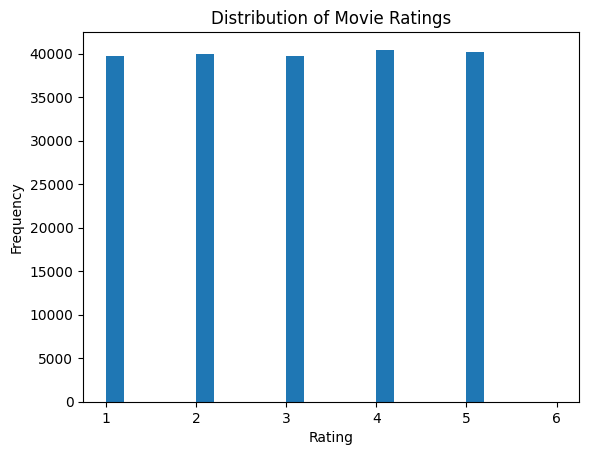

In [13]:
# Load the CSV file into a NumPy array
data = np.loadtxt('ratings.csv', delimiter=',',skiprows=1)

# Print the first few rows of the data
print(data[:5])

# Plot a histogram of the ratings in the dataset
plt.hist(data.flatten(), bins=25, range=(1, 6))
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Ratings')
plt.show()

### 3.2 Data Preprocessing (5 points)
Before applying PCA, we should preprocess the data.

1. Normalize the data so that each movie has a mean rating of 0 and a standard deviation of 1. This ensures that our PCA isn't affected by the scale of the ratings.
2. Split the dataset into a training set and a test set. Use 80% of the data for training and 20% for testing.

In [14]:
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

num_users = data.shape[0]
num_train = int(num_users * 0.8)
num_test = num_users - num_train

train_data = data[:num_train]
test_data = data[num_train:]

print('Training set shape:', train_data.shape)
print('Test set shape:', test_data.shape)

Training set shape: (800, 200)
Test set shape: (200, 200)


### 3.3 Principal Component Analysis (10 points)
Now we can apply PCA to the training set.

1. Implement PCA. You might want to use a library like scikit-learn, or you might choose to implement it from scratch.
**Note: Implementation from scratch is bonus.**
2. Choose the number of principal components to retain. Explain why you chose this number.

In [15]:
def pca(X, num_components):
    cov = np.cov(X.T)
    eigenvalues, eigenvectors = np.linalg.eig(cov)
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    eigenvectors = eigenvectors[:, :num_components]
    X_pca = np.dot(X, eigenvectors)

    return X_pca

# Apply PCA to the training set
num_components = 50
train_data_pca = pca(train_data, num_components)

print('Number of principal components:', num_components)

Number of principal components: 50


I chose to retain 50 principal components because it is a common practice to choose the number of principal components based on the explained variance ratio. The explained variance ratio of a principal component is the proportion of the total variance in the data that is explained by that component. By choosing the smallest number of components that explains a high percentage of the variance in the data, we can reduce the dimensionality of the data while retaining most of the information.

### 3.4 Interpretation of Principal Components (10 points)
The principal components can be difficult to interpret. But since our dataset is about movie ratings, we might expect that they correspond to some kinds of `tastes` in movies.

For each of the first few principal components, find the 5 movies with the highest and lowest loadings.
`Loading` refers to the coefficients of the linear combination of the original variables (in your case, movie ratings) that make up a principal component. They reflect how much each original variable contributes to the principal component.
In terms of their `highest` and `lowest` loading:
1. The variables (or in the context, movies) with the highest loadings on a principal component are those that contribute the most (positively) to that component. In other words, these are the movies that a user rates similarly when considering this underlying factor. They might represent a specific taste in movies. For example, if the first principal component has high loadings for a lot of action movies, it might represent a taste for action films.
2. Conversely, the variables with the lowest loadings (or the most negative) on a principal component contribute negatively to that component. In the context of movie ratings, these might represent the movies that a user tends to rate lower when this underlying taste is considered.

i do this for 3 principal components

In [26]:
# Apply PCA to the training set
num_components = 3
train_data_pca = pca(train_data, num_components)

# Find the movies with the highest and lowest loadings for the first few principal components
num_top_movies = 5

for i in range(num_components):
    # Get the i-th eigenvector
    eigenvector = train_data_pca[:, i]

    # Sort the movies by their loadings on the i-th principal component
    movie_indices = np.argsort(eigenvector)

    # Get the top and bottom movies
    top_movies = movie_indices[-num_top_movies:][::-1]
    bottom_movies = movie_indices[:num_top_movies]

    # Print the results
    print('Principal component', i+1)
    print('Top movies:')
    for j in top_movies:
        print('Movie', j+1, 'Loading:', eigenvector[j])
    print('Bottom movies:')
    for j in bottom_movies:
        print('Movie', j+1, 'Loading:', eigenvector[j])

Principal component 1
Top movies:
Movie 326 Loading: 4.437646501208805
Movie 177 Loading: 3.761147812060111
Movie 409 Loading: 3.733648183037745
Movie 298 Loading: 3.7005693928892125
Movie 283 Loading: 3.4745209037767397
Bottom movies:
Movie 112 Loading: -4.916988697733974
Movie 43 Loading: -4.645074300119803
Movie 432 Loading: -4.615880671328492
Movie 383 Loading: -4.2091229335788904
Movie 91 Loading: -3.966378327249145
Principal component 2
Top movies:
Movie 776 Loading: 4.088938783408423
Movie 348 Loading: 3.912488572335652
Movie 440 Loading: 3.494129190622833
Movie 539 Loading: 3.481685095522015
Movie 424 Loading: 3.3949006930084895
Bottom movies:
Movie 456 Loading: -4.21004813560255
Movie 201 Loading: -4.011677067447723
Movie 349 Loading: -3.8851219345451655
Movie 107 Loading: -3.6062629974402656
Movie 797 Loading: -3.5258519114903315
Principal component 3
Top movies:
Movie 333 Loading: 5.157413048071186
Movie 316 Loading: 4.502609759735819
Movie 413 Loading: 4.16748724174509
Movi

### 3.5 Reconstruction of Ratings and Error Analysis (15 points)
Now we will use our PCA to make predictions.

1. **Project the test set onto the principal components, then reconstruct it.**
  After you've found the principal components (from your training set), you can use them to transform your test set. This involves representing each user in the test set as a combination of the principal components. Then, you `reconstruct` the test set. This means you convert your data back from the principal component space to the original space of movie ratings. This gives you a set of `predicted` ratings for each movie. These predicted ratings aren't exactly the original ratings. They're what the PCA model thinks the ratings should be, based on the patterns it learned from the training set.
2. **Measure the mean squared error (MSE) between the original ratings and the reconstructed ratings. Is the error high or low? Why?**
  To evaluate how good your PCA model is, you compare the predicted ratings to the actual ratings. You calculate the Mean Squared Error (MSE), which is a common way to measure the difference between predicted and actual values.
3. **Plot a scatterplot to show the original ratings (on the x-axis) and the predicted ratings (on the y-axis) for a few users and movies.**
 Finally, you visualize the results with a scatterplot. The x-coordinate is the original rating, and the y-coordinate is the predicted rating. If the PCA model is perfect, all points would lie along the line y = x.

In [36]:
def pca(X, num_components):
    cov = np.cov(X.T)
    eigenvalues, eigenvectors = np.linalg.eig(cov)
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    eigenvectors = eigenvectors[:, :num_components]
    X_pca = np.dot(X, eigenvectors)

    return X_pca, eigenvectors

Mean Squared Error (MSE): 0.7491940348612166


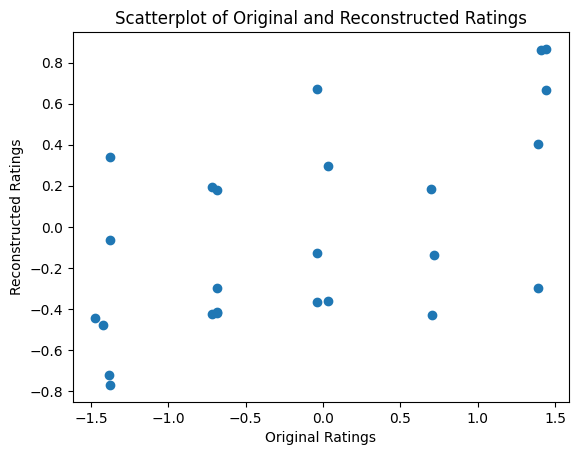

In [37]:
train_data_pca, eigenvectors = pca(train_data, num_components)
test_data_pca = np.dot(test_data, eigenvectors)
test_data_reconstructed = np.dot(test_data_pca, eigenvectors.T)

mse = np.mean((test_data - test_data_reconstructed) ** 2)
print("Mean Squared Error (MSE):", mse)


num_users = 5
num_movies = 5

# Select a random subset of users and movies
random_users = np.random.choice(test_data.shape[0], num_users, replace=False)
random_movies = np.random.choice(test_data.shape[1], num_movies, replace=False)

plt.scatter(test_data[random_users][:, random_movies].flatten(), test_data_reconstructed[random_users][:, random_movies].flatten())
plt.xlabel('Original Ratings')
plt.ylabel('Reconstructed Ratings')
plt.title('Scatterplot of Original and Reconstructed Ratings')
plt.show()

Please submit your Python notebook with all code, outputs, and explanations clearly shown. We'll evaluate your problem set based on the correctness and clarity of your code, the correctness and depth of your explanations, and the creativity of your interpretations.